In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings

In [15]:
df = pd.read_csv(r'..\data\03_processed\01_preprocessed.csv')
df.head()

,ID,Adres e-mail,Nazwa,"Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.",W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,...,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,"Jeżeli pominięto branżę, na której się znasz dopisz ją:"
0,1,anonymous,NaN,"Projekt ""data"" będący mobilną stacją benzynową...",Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,...,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN
1,2,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,3,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,NaN
3,4,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,NaN
4,5,anonymous,NaN,Wirtualni doradcy wpływający na pozytywną zmia...,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,LawTech


In [16]:
print(df.dtypes)

ID                                                                                                       int64
Adres e-mail                                                                                            object
Nazwa                                                                                                  float64
Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.     object
W jaki sposób chcesz uczestniczyć w Community?                                                          object
Programming: R                                                                                         float64
Programming: Python                                                                                    float64
Programming: Bash                                                                                      float64
Version Control: GIT                                                                                   float64
C

In [17]:
columns_to_drop = ['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.', 'Jeżeli pominięto branżę, na której się znasz dopisz ją:']
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
df.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)",...,"Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:",FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
0,1,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,4.0,...,NaN,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,Excel,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,NaN,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [19]:
columns_not_for_analysis = ['ID', 'Adres e-mail', 'Nazwa', 'W jaki sposób chcesz uczestniczyć w Community?', 'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:']
df1 = df.drop(columns=columns_not_for_analysis)

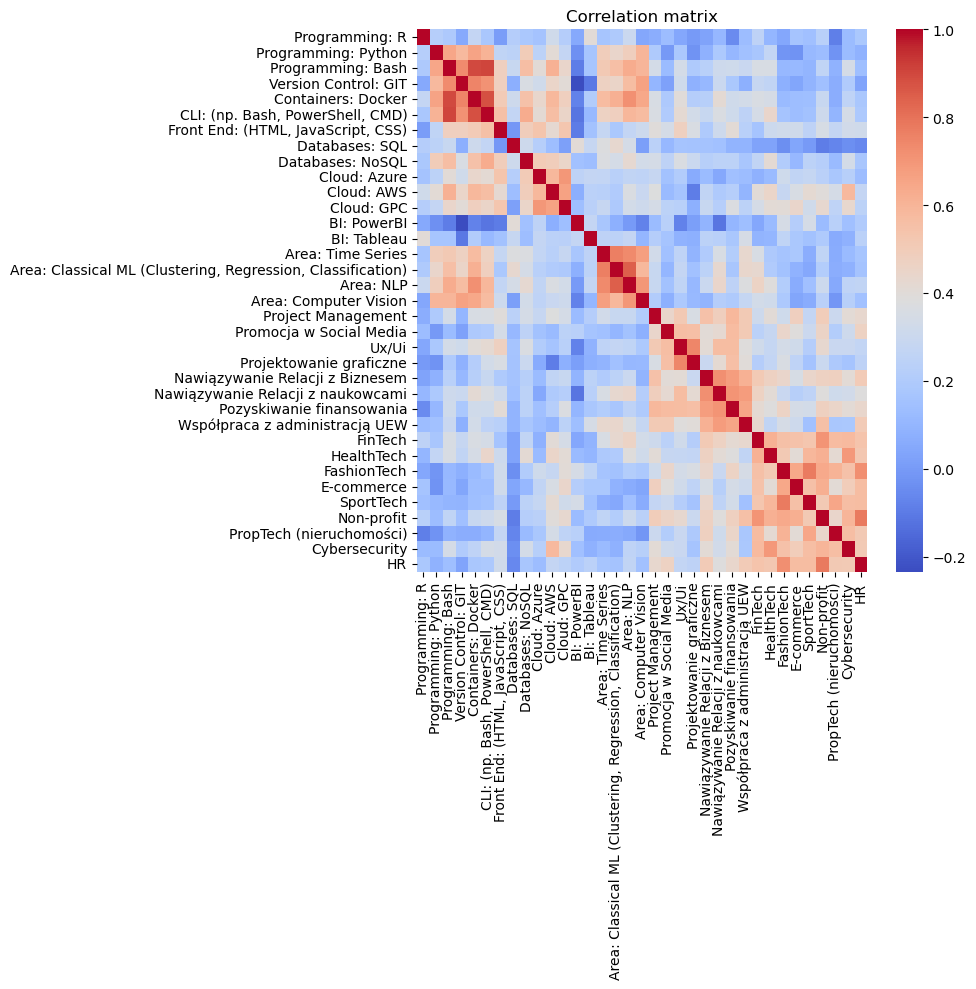

In [20]:
correlation_matrix = df1.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

It hard to read so it should be split

In [21]:
programming = ['Programming: R', 'Programming: Python', 'Programming: Bash', 'Version Control: GIT'
               ,'CLI: (np. Bash, PowerShell, CMD)', 'Front End: (HTML, JavaScript, CSS)']
machine_learning = ['Containers: Docker','Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision']
databases = ['Databases: SQL', 'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau']
soft = ['Project Management', 'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
        'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 'Współpraca z administracją UEW']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']


In [22]:
new_column_names = {
    'Programming: R': 'R',
    'Programming: Python': 'Python',
    'Programming: Bash': 'Bash',
    'Version Control: GIT': 'GIT',
    'CLI: (np. Bash, PowerShell, CMD)': 'CLI',
    'Front End: (HTML, JavaScript, CSS)': 'FrontEnd',
    'Containers: Docker': 'Docker',
    'Area: Time Series': 'TimeSeries',
    'Area: Classical ML (Clustering, Regression, Classification)': 'ClassicalML',
    'Area: NLP': 'NLP',
    'Area: Computer Vision': 'ComputerVision',
    'Databases: SQL': 'SQL',
    'Databases: NoSQL': 'NoSQL',
    'Cloud: Azure': 'Azure',
    'Cloud: AWS': 'AWS',
    'Cloud: GPC': 'GPC',
    'BI: PowerBI': 'PowerBI',
    'BI: Tableau': 'Tableau',
    'Project Management': 'ProjectManagement',
    'Promocja w Social Media': 'SocialMedia',
    'Ux/Ui': 'UxUi',
    'Projektowanie graficzne': 'GraphicDesign',
    'Nawiązywanie Relacji z Biznesem': 'BusinessRelations',
    'Nawiązywanie Relacji z naukowcami': 'ScientistRelations',
    'Pozyskiwanie finansowania': 'Funding',
    'Współpraca z administracją UEW': 'UEWAdmin',
    'FinTech': 'FinTech',
    'HealthTech': 'HealthTech',
    'FashionTech': 'FashionTech',
    'E-commerce': 'Ecommerce',
    'SportTech': 'SportTech',
    'Non-profit': 'NonProfit',
    'PropTech (nieruchomości)': 'PropTech',
    'Cybersecurity': 'Cybersecurity',
    'HR': 'HR'
}
df1.rename(columns=new_column_names, inplace=True)

In [23]:
programming = ['R', 'Python', 'Bash', 'GIT', 'CLI', 'FrontEnd']
machine_learning = ['Docker', 'TimeSeries', 'ClassicalML', 'NLP', 'ComputerVision']
databases = ['SQL', 'NoSQL', 'Azure', 'AWS', 'GPC', 'PowerBI', 'Tableau']
soft = ['ProjectManagement', 'SocialMedia', 'UxUi', 'GraphicDesign', 'BusinessRelations', 'ScientistRelations', 'Funding', 'UEWAdmin']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'Ecommerce', 'SportTech', 'NonProfit', 'PropTech', 'Cybersecurity', 'HR']

In [24]:
categories = [programming, machine_learning, databases, soft, branches]
titles = ['Programming', 'Machine Learning', 'Databases', 'Soft Skills', 'Branches']

NameError: name 'cms' is not defined

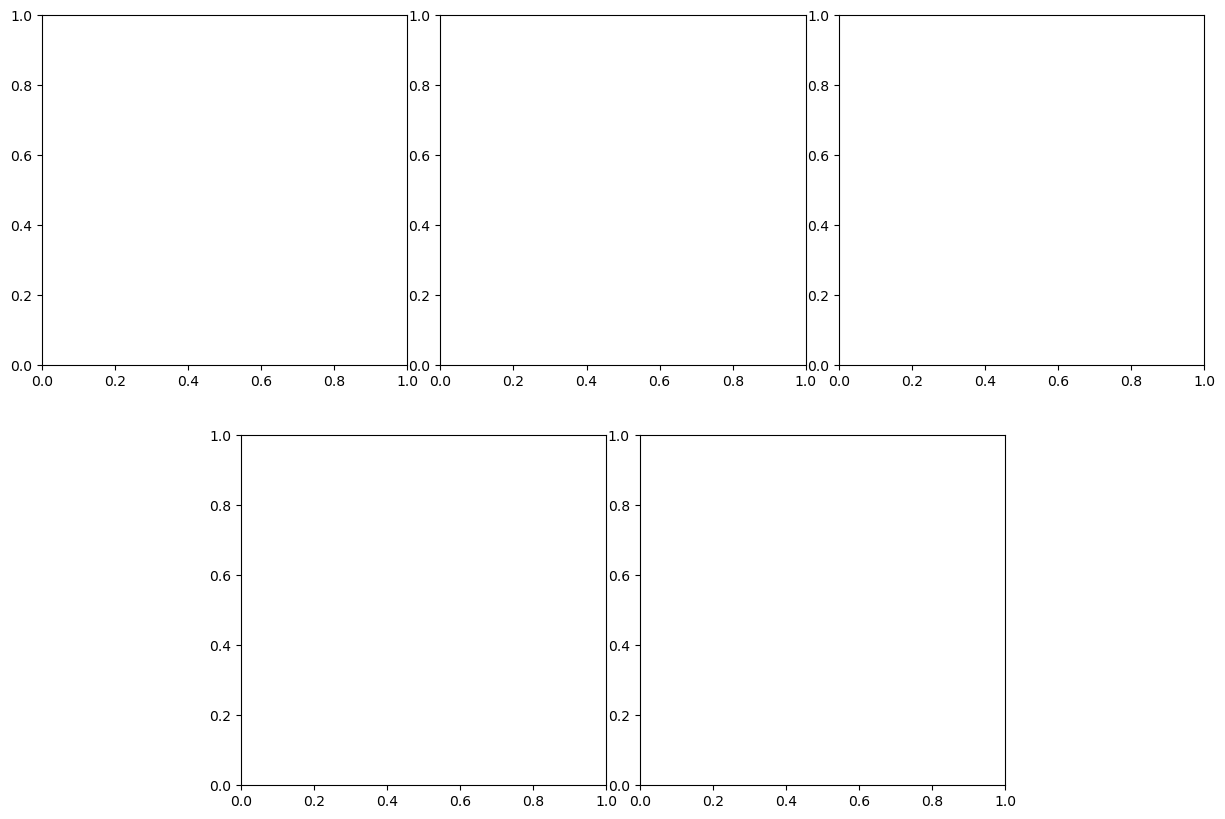

In [25]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)


for i, cm in enumerate(cms):
    sns.heatmap(cm, cmap='coolwarm', annot=True, fmt=".2f", ax=[ax1, ax2, ax3, ax4, ax5][i])
    [ax1, ax2, ax3, ax4, ax5][i].set_title(titles[i])
    [ax1, ax2, ax3, ax4, ax5][i].set_xticklabels([ax1, ax2, ax3, ax4, ax5][i].get_xticklabels(), rotation=45)

plt.subplots_adjust(wspace=1.5, hspace=0.5)
plt.show()

# Variables distributions

In [26]:
rating_scale = CategoricalDtype(categories=[0,1, 2, 3, 4], ordered=True)

for column in programming, machine_learning, databases, soft, branches:
    df1[column] = df1[column].astype(rating_scale)

c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

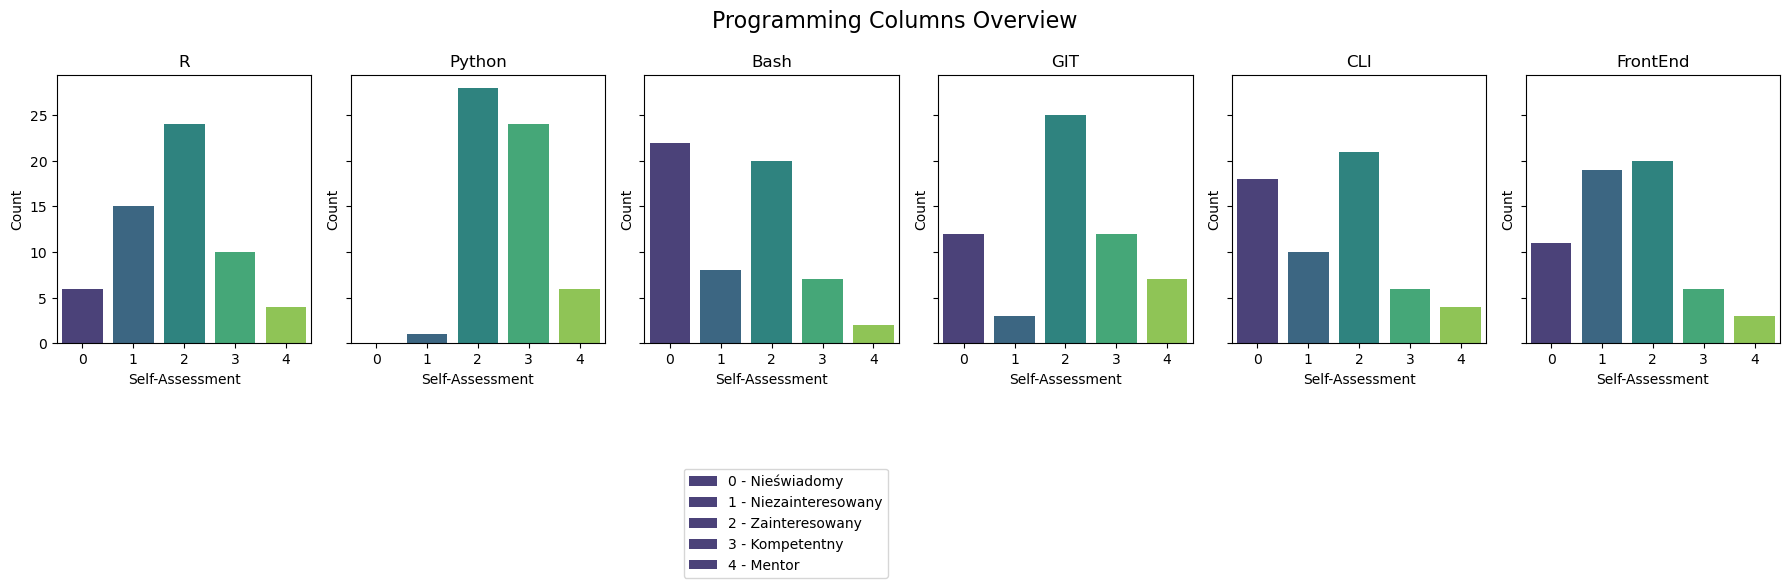

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=len(programming), figsize=(18, 4), sharey=True)

for i, ax in enumerate(axes):
    sns.countplot(x=programming[i], data=df1, ax=ax, palette='viridis')
    ax.set_title(programming[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

# Create custom legend
legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

# Add custom legend below the plot
fig.legend(legend_labels, bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10)

fig.suptitle('Programming Columns Overview', fontsize=16)
plt.tight_layout()
plt.show()

c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

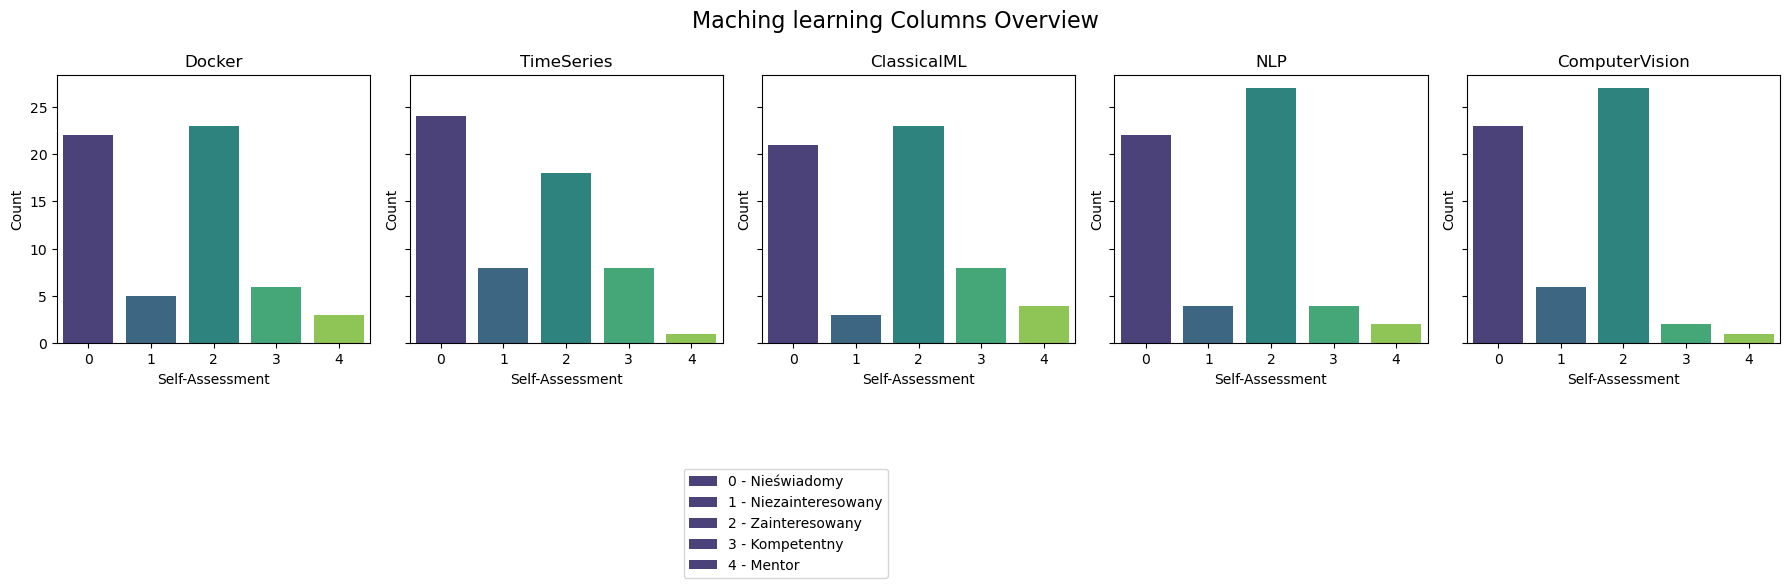

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=len(machine_learning), figsize=(18, 4), sharey=True)

for i, ax in enumerate(axes):
    sns.countplot(x=machine_learning[i], data=df1, ax=ax, palette='viridis')
    ax.set_title(machine_learning[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

# Create custom legend
legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

# Add custom legend below the plot
fig.legend(legend_labels, bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10)

fig.suptitle('Maching learning Columns Overview', fontsize=16)
plt.tight_layout()
plt.show()

c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

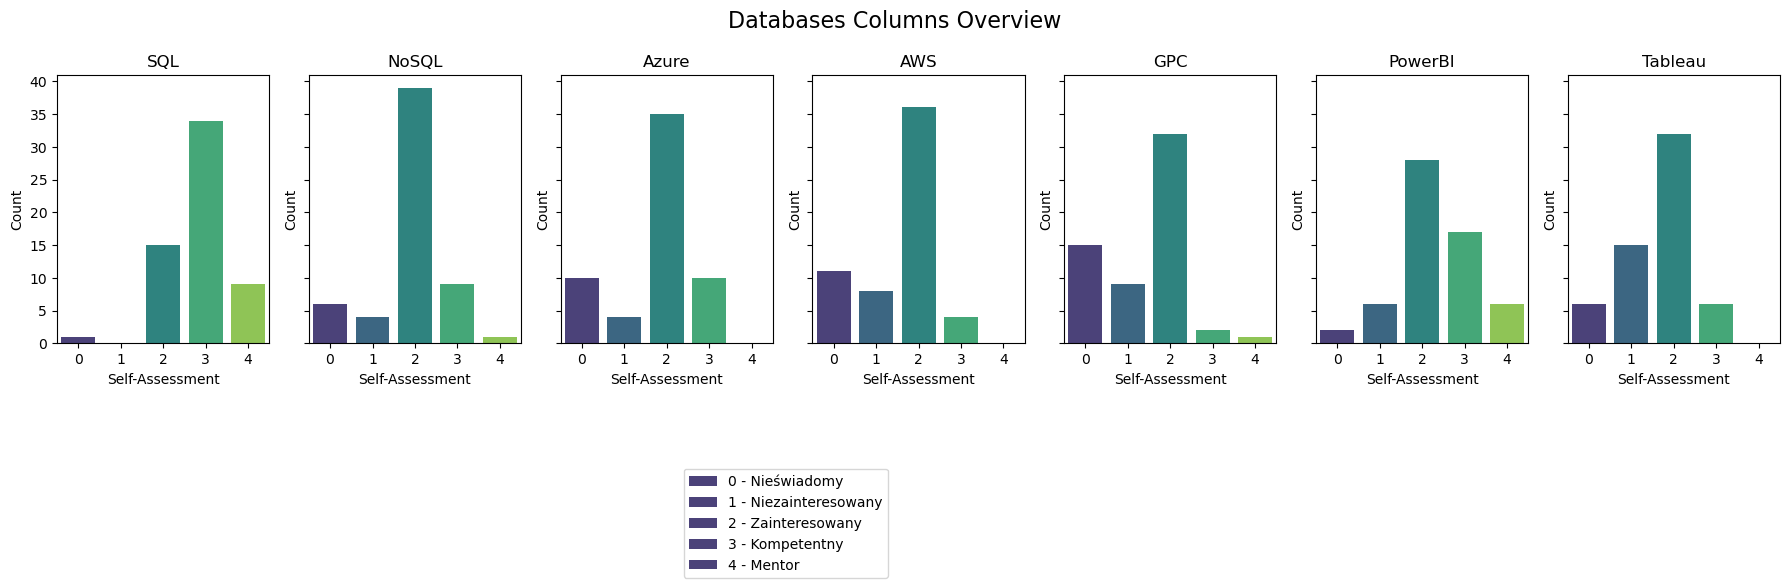

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=len(databases), figsize=(18, 4), sharey=True)

for i, ax in enumerate(axes):
    sns.countplot(x=databases[i], data=df1, ax=ax, palette='viridis')
    ax.set_title(databases[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

# Create custom legend
legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

# Add custom legend below the plot
fig.legend(legend_labels, bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10)

fig.suptitle('Databases Columns Overview', fontsize=16)
plt.tight_layout()
plt.show()

c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

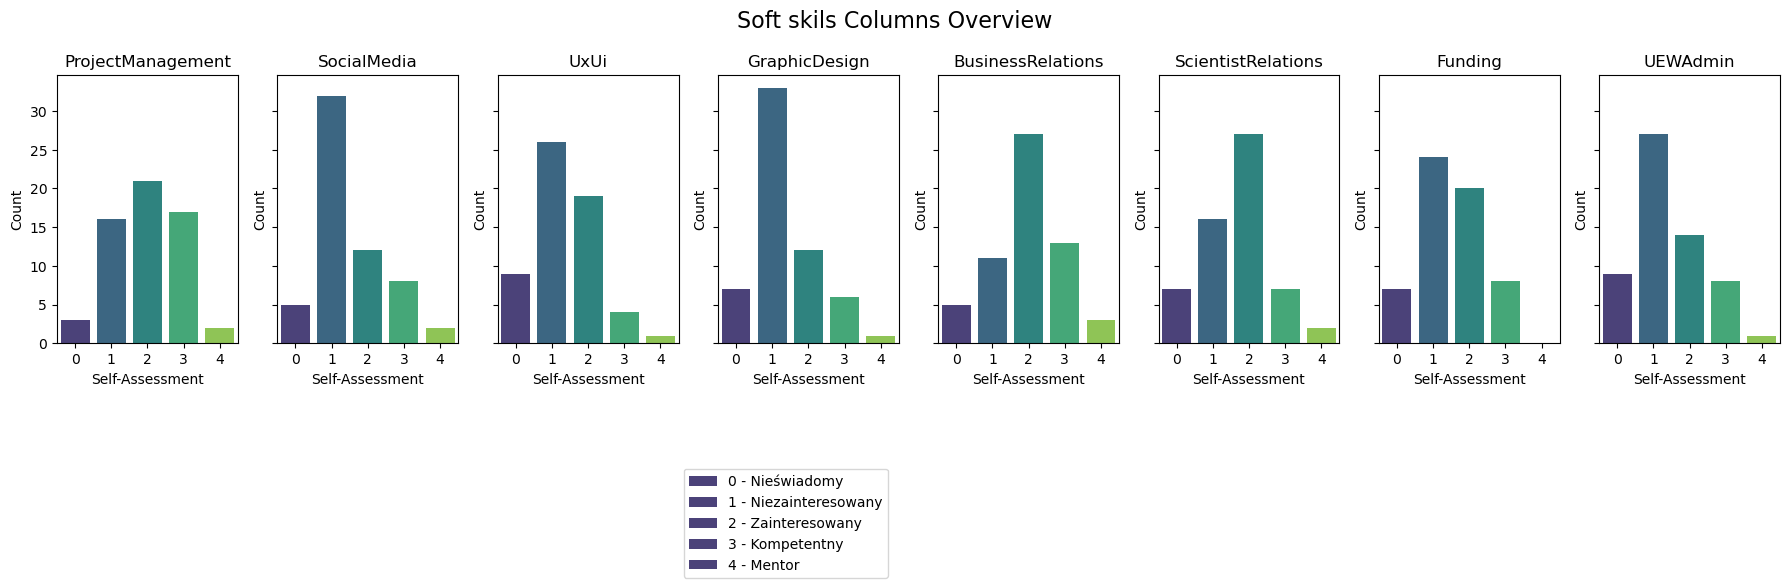

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=len(soft), figsize=(18, 4), sharey=True)

for i, ax in enumerate(axes):
    sns.countplot(x=soft[i], data=df1, ax=ax, palette='viridis')
    ax.set_title(soft[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

# Create custom legend
legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

# Add custom legend below the plot
fig.legend(legend_labels, bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10)

fig.suptitle('Soft skils Columns Overview', fontsize=16)
plt.tight_layout()
plt.show()

c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\glabm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

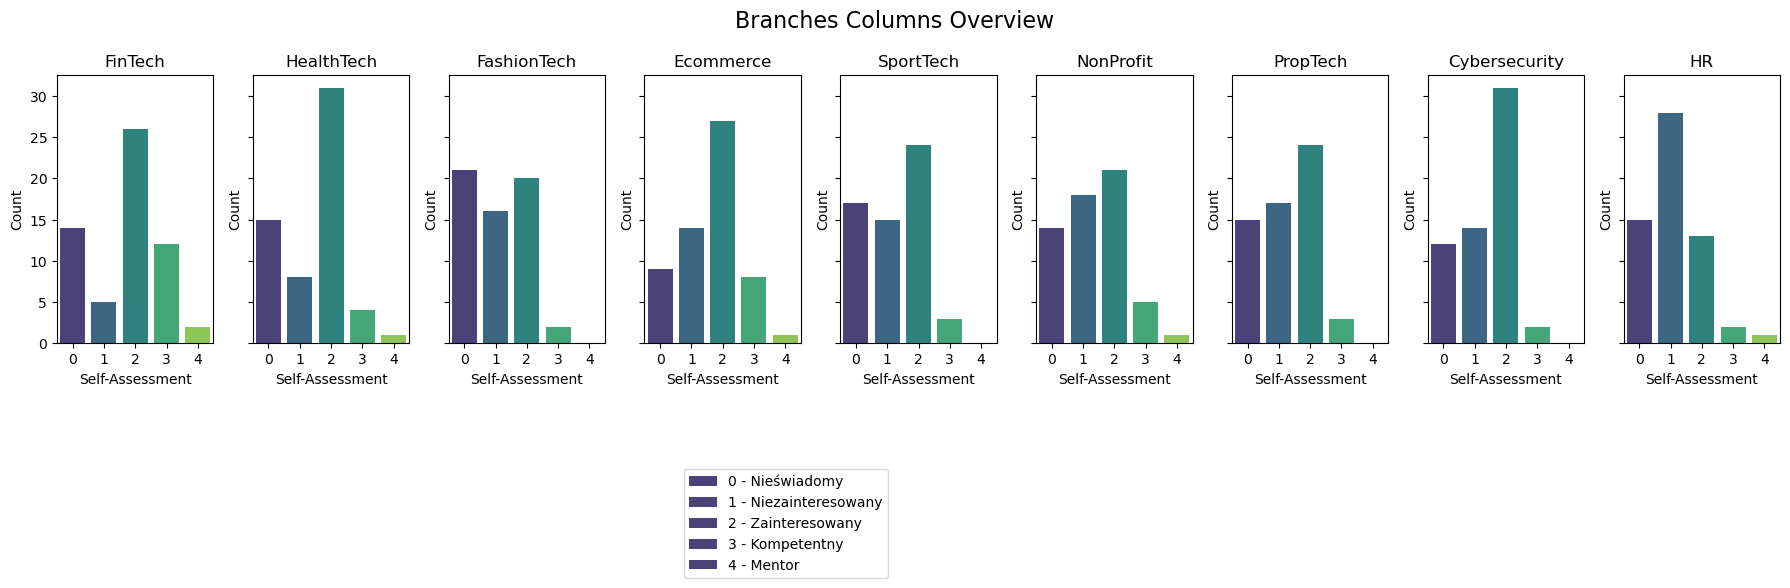

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=len(branches), figsize=(18, 4), sharey=True)

for i, ax in enumerate(axes):
    sns.countplot(x=branches[i], data=df1, ax=ax, palette='viridis')
    ax.set_title(branches[i])
    ax.set_xlabel('Self-Assessment')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

# Create custom legend
legend_labels = [
    '0 - Nieświadomy',
    '1 - Niezainteresowany',
    '2 - Zainteresowany',
    '3 - Kompetentny',
    '4 - Mentor'
]

# Add custom legend below the plot
fig.legend(legend_labels, bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10)

fig.suptitle('Branches Columns Overview', fontsize=16)
plt.tight_layout()
plt.show()